In [ ]:
! pip install -r requirements.txt

# ChromeDriver 下載
- 下載前查看 Chrome 版本。設定 → 左上角三點 → 關於 Chrome 就會有版本囉
- https://chromedriver.chromium.org/downloads


In [7]:
#爬蟲工具
import requests 
from bs4 import BeautifulSoup

#模擬瀏覽器工具 , 因新聞網頁為動態新聞網站 , 所以要使用輔助工具不然爬不到
from selenium import webdriver

''' 若要測試請刪掉三個單引號
driver = webdriver.Chrome('../chromedriver.exe')
driver.get('https://www.google.com')
driver.close()
''' 

" 若要測試請刪掉三個單引號\ndriver = webdriver.Chrome('../chromedriver.exe')\ndriver.get('https://www.google.com')\ndriver.close()\n"

In [16]:
driver = webdriver.Chrome('../chromedriver.exe')
url = 'https://www.ettoday.net/news/news-list.htm'
driver.get(url)
# 使用 selenium 開啟網頁

In [17]:
#自動往下滑
import time
for i in range(10):
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, 10000);")

In [18]:
html_source = driver.page_source
# 使用 bs4 進行 HTML 解析 (使用 lxml 解析)
soup_html = BeautifulSoup(html_source,'lxml')
news = []
for d in soup_html.find(class_="part_list_2").find_all('h3'):
    date = d.find(class_="date").text
    title = d.find_all('a')[-1].text
    news.append({
        'date': date,
        'title': title, 
    }) # 加入 news 字串中儲存
    print(date,title)


2020/02/16 19:23 先肌肉痠痛、咳嗽再發燒！台灣醫界公布：吸菸者感染，症狀較嚴重！
2020/02/16 19:14 新冠肺炎蔓延…日本淪陷！吳淡如曝「東京驚人現況」
2020/02/16 19:09 首批包機台商監測期滿！「18日早上6點」解除隔離　143位遊覽車接回
2020/02/16 19:03 凱旋重機要推「250cc入門級輕檔車」？聯手印度車廠拓展版圖
2020/02/16 19:00 第一顆鑽寵自己　De Beers秀氣設計討喜
2020/02/16 18:57 「杜拜，我們來了！」高雄農產蜜棗、珍珠芭樂成功進軍中東
2020/02/16 18:56 快訊／日本愛知縣再增1例！夏威夷返國夫妻友人發燒　確診也感染
2020/02/16 18:55 LULU洩腿根踩場A-Lin...圓夢攻蛋「大膽一句話」爆嗆天團！
2020/02/16 18:55 新冠肺炎確診20例、1死亡！累計通報1834人、128人還在居家隔離
2020/02/16 18:51 鑽石公主號台灣父子確診　指揮中心：由日本安排到醫院好好治療
2020/02/16 18:50 擴大篩檢！　指揮中心曝「3對象」納入監測名單...結果公布前須在家
2020/02/16 18:49 確診2例社區感染！陳時中：疫調結果風險高「不排除公布活動地點」
2020/02/16 18:44 啟動2020年度擴大防搶安全演練　新北農漁會讓民眾好安心
2020/02/16 18:43 《金牌救援》太熱血網敲碗第2季　SBS「洩端倪」回應了！
2020/02/16 18:43 桃園少年搭小黃遺失錢包超慌　警調10餘支監視器2小時找回
2020/02/16 18:38 台灣確診2名「無旅遊史」個案　指揮官陳時中：屬於社區感染
2020/02/16 18:36 威士特丹號2/4停高雄港！指揮中心掌握215名接觸者...下船地點曝光
2020/02/16 18:32 A-Lin放送1萬支螢光棒「最終場才有」...主辦單位親曝無奈真相！
2020/02/16 18:31 HBL／新冠肺炎疫情威脅仍在　決賽不排除延期
2020/02/16 18:31 60多歲「白牌計程車司機」確診新冠肺炎！　指揮中心：都載中港澳遊客
2020/02/16 18:30 首例死亡61歲男「罹患B肝、糖尿病」無旅遊史　初診判定為肺

In [19]:
driver.close()

# 標籤雲

In [103]:

import csv #使用 csv 儲存
import numpy as np # import imageio 讀圖
import jieba  # 判斷是否為一個名詞 (類似字典) 中文辭典套件
from wordcloud import WordCloud, ImageColorGenerator , STOPWORDS #字雲主要套件
import matplotlib.pyplot as plt #印字雲

fn = 'cloudtext.csv'
with open(fn,'w',newline='',encoding='utf-8') as csvFile:
    csvWriter = csv.writer(csvFile)
    jieba.set_dictionary('wcenv\Lib\site-packages\jieba\dict.txt')
    for i in range(len(news)):
        seg_list = jieba.cut(news[i]['title'])
        csvWriter.writerow(seg_list)



Building prefix dict from d:\Program\Python\LinHW\WordCloud\wcenv\Lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.u3749d2083d15568a09fd0ff1635a80ba.cache
Loading model cost 1.112 seconds.
Prefix dict has been built successfully.


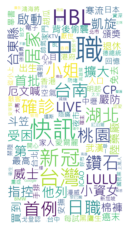

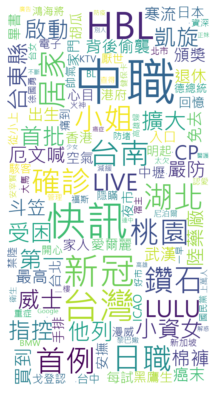

In [122]:
your_list = []
with open('cloudtext.csv', 'r',encoding='utf-8') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[0] for i in reader])

font = r'msjh.ttc'
mask = np.array(Image.open('tw.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path=font,background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(your_list)

# store to file
wc.to_file('test.png')

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[7,7])
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
